In [1]:
#!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,make_scorer,make_scorer, f1_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
tweets_df =  pd.read_csv("tweets_preproc.csv")
tweets_df = tweets_df.drop('Unnamed: 0', axis=1)
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
0,estrenos mensuales en netflix disney y prime ...,159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,estrenos mensuales netflix disney prime video ...,estren mensual netflix disney prim vide blog
1,albert alfred y la magia echa serie music...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.421,Positivo,albert alfredo magia echa serie musica literat...,albert alfred magi echa seri music literatur n...
2,tratar a todos los equipos de futbol en las r...,238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.402,Positivo,tratar equipos futbol retransmisiones igual,trat equip futbol retransmision igual
3,bajada de precio de la fibra mejorar la calid...,82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'co...",0.557,Positivo,bajada precio fibra mejorar calidad sonido ima...,baj preci fibr mejor calid son imag canal mejo...
4,postes de cortando la dp a la altura del km e...,196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.128,Negativo,postes cortando altura km ares corona,post cort altur km ares coron
...,...,...,...,...,...,...,...,...,...,...
159851,los clientes ya sabemos eso los que no se sab...,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056,"{'neg': 0.056, 'neu': 0.792, 'pos': 0.151, 'co...",0.476,Positivo,clientes sabemos saben cumplen contrato deberi...,client sab sab cumpl contrat deberi leer contr...
159852,lo que me gustaria saber es por que llevo una...,1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.827,Positivo,gustaria saber llevo semana contratando servic...,gustari sab llev seman contrat servici ofert g...
159853,deberias cambiar esa bandera absurda o ahora ...,1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,deberias cambiar bandera absurda ahora lobo,deberi cambi bander absurd ahor lob
159854,ya me falta poco y cambio de empresa suerte,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.509,Positivo,falta cambio empresa suerte,falt cambi empres suert


In [4]:
tweets_positivo_df = tweets_df[tweets_df['Polaridad'] == "Positivo"]
tweets_positivo_df = tweets_positivo_df.dropna()
tweets_positivo_df = tweets_positivo_df.sample(n = 20000)

tweets_negativo_df = tweets_df[tweets_df['Polaridad'] == "Negativo"]
tweets_negativo_df = tweets_negativo_df.dropna()
tweets_negativo_df = tweets_negativo_df.sample(n = 20000)

tweets_df = pd.concat([tweets_positivo_df,tweets_negativo_df])
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
122658,otros nooooo eh que te veo jajajja solo yo,859405948955348993,Twitter for Android,2022-01-13 11:45:18,1481593192957071361,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.951,Positivo,nooooo eh veo jajajja solo,noooo eh veo jajajj sol
155298,que te parece amigo,754710137802256384,Twitter Web App,2022-05-03 15:17:45,1521509323612041217,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",0.494,Positivo,parece amigo,parec amig
61235,y por ultimo radiactive de imagine dragons po...,1434089478914772992,Twitter Web App,2022-02-02 14:29:26,1488882255418298374,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.459,Positivo,ultimo radiactivo imagine dragones canciones f...,ultim radiact imagin dragon cancion favorit
89604,todavia sigo esperando mi movil prometido des...,1496803832713654279,Twitter for Android,2022-05-24 20:02:31,1529191131774427139,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.361,Positivo,todavia sigo esperando movil prometido hace meses,todavi sig esper movil promet hac mes
15966,me sumo al retoy mas canas como previo de...,281493324,Twitter for iPhone,2022-03-24 13:56:04,1506993252314103816,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.296,Positivo,sumo reto mas canas previo rechazo,sum ret mas can previ rechaz
...,...,...,...,...,...,...,...,...,...,...
122359,sois unos ladrones y mentirosos ojala nadie ...,3036998597,Twitter for Android,2022-01-05 18:40:02,1478798459251703812,"{'neg': 0.192, 'neu': 0.658, 'pos': 0.15, 'com...",-0.556,Negativo,ladrones mentirosos ojala nadie contrate hice ...,ladron mentir ojal nadi contrat hic contrat gr...
98870,ahorra esfuerzo tiempo y dinero cambiate de...,959113286,Twitter for Android,2022-01-14 11:06:26,1481945801052102660,"{'neg': 0.038, 'neu': 0.962, 'pos': 0.0, 'comp...",-0.318,Negativo,ahorra esfuerzo tiempo dinero cambiante operad...,ahorr esfuerz tiemp diner cambiant oper grup c...
44281,buenos dias he recibido un sms y un correo el...,905715055857213440,Twitter Web App,2022-06-03 11:10:40,1532681164502315009,"{'neg': 0.108, 'neu': 0.852, 'pos': 0.04, 'com...",-0.643,Negativo,buenos dias recibido sms correo electronico fa...,buen dias recib sms corre electron factur pend...
132397,flipar con el apartado multimedia de este mo...,1430108327065833473,Twitter for Android,2022-03-04 13:06:32,1499733029257977859,"{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'comp...",-0.440,Negativo,fijar apartado multimedia movilako,fij apart multimedi movilak


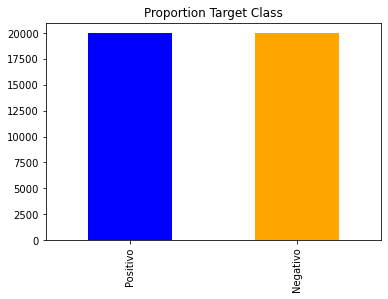

In [5]:
count_class=pd.value_counts(tweets_df["Polaridad"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [6]:
tweets_df['Texto Preprocesado'] = tweets_df['Texto Preprocesado'].astype(str)
tweets_df['Polaridad'] = tweets_df['Polaridad'].replace(['Positivo', 'Negativo'], [1, 0]) #!!!!!!

In [7]:
main_text = tweets_df['Texto Preprocesado']
target = tweets_df['Polaridad']

print(len(main_text))
print(len(target))

40000
40000


In [8]:
cv=CountVectorizer()


train_data,test_data = train_test_split(tweets_df,train_size=0.8,random_state=0)

X_train = cv.fit_transform(train_data['Texto Preprocesado'])
y_train = train_data['Polaridad']
X_test = cv.transform(test_data['Texto Preprocesado'])
y_test = test_data['Polaridad']

In [9]:
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
params = {'alpha': [0,0.01, 0.1, 0.5, 1.0, 10.0 ],
          'fit_prior': [True, False]
         }
# Definir las métricas a utilizar
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score,needs_threshold=True)
}

# Entrena los datos
multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params,scoring=scoring,refit='accuracy', n_jobs=-1, cv=5, verbose=10)
multinomial_nb_grid.fit(X_train,y_train)

# Predice los datos de test
y_pred = multinomial_nb_grid.predict(X_test)

print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Accuracy Through Grid Search : 0.786
Best Parameters : {'alpha': 0.5, 'fit_prior': True}



In [11]:
for accuracy, f1, roc_auc, params in zip(multinomial_nb_grid.cv_results_['mean_test_accuracy'], 
                             multinomial_nb_grid.cv_results_['mean_test_f1'], multinomial_nb_grid.cv_results_['mean_test_roc_auc'], 
                             multinomial_nb_grid.cv_results_['params']):
       print("%0.5f %0.5f %0.5f for %r" % (accuracy,f1,roc_auc, params))

0.76031 0.75948 0.79889 for {'alpha': 0, 'fit_prior': True}
0.76031 0.75948 0.79889 for {'alpha': 0, 'fit_prior': False}
0.77287 0.77193 0.84000 for {'alpha': 0.01, 'fit_prior': True}
0.77287 0.77193 0.84000 for {'alpha': 0.01, 'fit_prior': False}
0.78106 0.78003 0.85403 for {'alpha': 0.1, 'fit_prior': True}
0.78109 0.78006 0.85403 for {'alpha': 0.1, 'fit_prior': False}
0.78572 0.78458 0.85923 for {'alpha': 0.5, 'fit_prior': True}
0.78569 0.78455 0.85923 for {'alpha': 0.5, 'fit_prior': False}
0.78438 0.78305 0.85902 for {'alpha': 1.0, 'fit_prior': True}
0.78441 0.78308 0.85902 for {'alpha': 1.0, 'fit_prior': False}
0.76719 0.76292 0.84522 for {'alpha': 10.0, 'fit_prior': True}
0.76719 0.76292 0.84522 for {'alpha': 10.0, 'fit_prior': False}


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def ConfusionMatrix(y_pred, y_test):
     # Compute and plot the Confusion matrix
     cf_matrix = confusion_matrix(y_test, y_pred)
     categories = ['Negativo','Positivo']
     group_names = ['True Neg','False Pos', 'False Neg','True Pos']
     group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / 
    np.sum(cf_matrix)]
     labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
     labels = np.asarray(labels).reshape(2,2)
     sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
     xticklabels = categories, yticklabels = categories)
     plt.xlabel("Predicted label", fontdict = {'size':14}, labelpad = 10)
     plt.ylabel("True label" , fontdict = {'size':14}, labelpad = 10)
     plt.title ("Matriz de confusion", fontdict = {'size':18}, pad = 20)

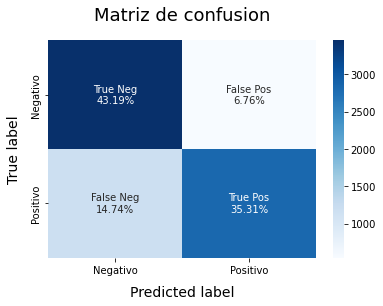

In [13]:
ConfusionMatrix(y_pred, y_test)

In [ ]:
clf = multinomial_nb_grid.best_estimator_
print('Test Accuracy (MultiNB): %.3f' % clf.score(X_test,y_test))

Test Accuracy (MultiNB): 0.785
